
# US - Mexico Level 1 Contiguity

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import libpysal
from libpysal.weights import Queen, Rook

In [2]:
old = gpd.read_parquet("../../geoplanar/datasets/usmex/usmex_1.parquet")
new = gpd.read_parquet("../../geoplanar/datasets/usmex/final_usmex1.parquet") 

# Checking for contiguity 

# Rook contiguity

In [3]:
old_rook = Rook.from_dataframe(old) # creating our old rook df

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))
/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [4]:
old_rook.n

81

In [5]:
new_rook = Rook.from_dataframe(new) # creating our new rook df

In [6]:
new_rook.n

81

### non-zero entries


In [7]:
old_rook.nonzero

354

In [8]:
new_rook.nonzero

372

### number of joins


In [9]:
old_rook.s0

354.0

In [10]:
new_rook.s0

372.0

### measure of the density of the spatial weights matrix


In [11]:
old_rook.pct_nonzero

5.3955189757658895

In [12]:
new_rook.pct_nonzero

5.66986739826246

### location 0 has the following neighbors


In [13]:
old_rook.neighbors[0] 

[13, 31]

In [14]:
new_rook.neighbors[0]

[13, 31]

### neighbors for each observation


In [15]:
old_rook.neighbors # old df

{0: [13, 31],
 1: [25, 2],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [24, 9, 6, 25],
 6: [9, 18, 5, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 31, 15],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [27, 31, 6, 23],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [24, 1, 5],
 26: [3, 4, 29],
 27: [18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [74, 35, 58, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [33, 58, 67],
 36: [80, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 67, 58, 56, 74, 77],
 43: [47, 52, 55, 44, 45,

In [16]:
new_rook.neighbors # new df

{0: [13, 31],
 1: [33, 2, 35, 25],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [73, 6, 24, 9, 61, 25],
 6: [18, 5, 73, 9, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 31, 15],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [6, 23, 73, 27, 31],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [1, 33, 5, 24, 61],
 26: [3, 4, 29],
 27: [73, 18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [1, 35, 58, 25, 74, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [1, 58, 67, 33],
 36: [80, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 

### full neighbor matrix


In [17]:
pd.DataFrame(*old_rook.full()).astype(int) # old rook df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# newrook df
pd.DataFrame(*new_rook.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### weight values


In [19]:
old_rook.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0],
 36

In [20]:
new_rook.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1

### number of neighbors for each observation


In [21]:
old_rook.cardinalities

{0: 2,
 1: 2,
 2: 1,
 3: 3,
 4: 3,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 4,
 34: 6,
 35: 3,
 36: 6,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 4,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 4,
 74: 5,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [22]:
new_rook.cardinalities

{0: 2,
 1: 4,
 2: 1,
 3: 3,
 4: 3,
 5: 6,
 6: 5,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 5,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 5,
 26: 3,
 27: 4,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 6,
 34: 6,
 35: 4,
 36: 6,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 6,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 8,
 74: 5,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

### overview of the distribution of the cardinalities
The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

In [23]:
old_rook.histogram

[(1, 2), (2, 11), (3, 14), (4, 18), (5, 12), (6, 16), (7, 4), (8, 4)]

In [24]:
new_rook.histogram

[(1, 2), (2, 10), (3, 11), (4, 15), (5, 15), (6, 19), (7, 4), (8, 5)]

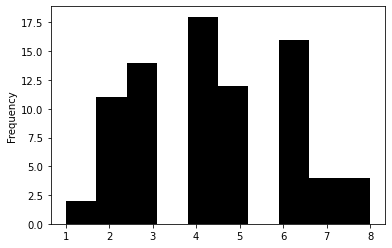

In [25]:
pd.Series(old_rook.cardinalities).plot.hist(color='k');

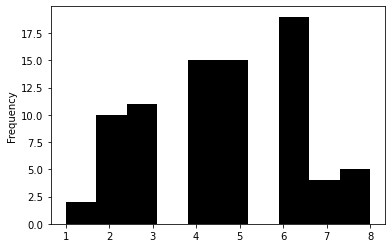

In [26]:
pd.Series(new_rook.cardinalities).plot.hist(color='k');

<AxesSubplot:ylabel='Frequency'>

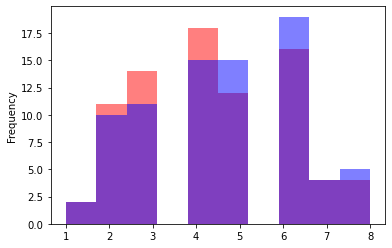

In [27]:
pd.Series(old_rook.cardinalities).plot.hist(color='r', alpha=0.5)
pd.Series(new_rook.cardinalities).plot.hist(color='b', alpha=.5)  

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

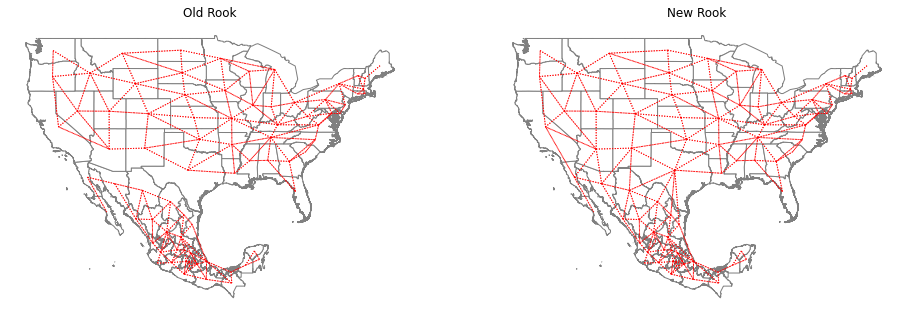

In [29]:
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
old.plot(edgecolor='grey', facecolor='w', ax=ax[0])
old_rook.plot(old, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Old Rook')

ax[0].axis('off')
new.plot(edgecolor='grey', facecolor='w', ax=ax[1])
new_rook.plot(new, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('New Rook')

# remove the axis
ax[1].set_axis_off()

# Queen Contiguity

In [30]:
old_queen = Queen.from_dataframe(old) # creating our old queen df

In [31]:
old_queen.n

81

In [32]:
new_queen = Queen.from_dataframe(new) # creating our new queen df

In [33]:
new_queen.n

81

In [34]:
old_queen.n == old_rook.n

True

In [35]:
new_queen.n == new_rook.n

True

### non-zero entries


In [36]:
old_queen.nonzero

358

In [37]:
new_queen.nonzero

376

### number of joins


In [38]:
old_queen.s0

358.0

In [39]:
new_queen.s0

376.0

### measure of the density of the spatial weights matrix


In [40]:
old_queen.pct_nonzero

5.4564852918762385

In [41]:
new_queen.pct_nonzero

5.730833714372809

### location 0 has the following neighbors


In [42]:
old_queen.neighbors[0]

[13, 31]

In [43]:
new_queen.neighbors[0]

[13, 31]

### neighbors for each observation


In [44]:
old_queen.neighbors

{0: [13, 31],
 1: [25, 2],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [24, 9, 6, 25],
 6: [9, 18, 5, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 15, 31],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [27, 31, 6, 23],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [24, 1, 5],
 26: [3, 4, 29],
 27: [18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [35, 36, 58, 74, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [33, 58, 67],
 36: [80, 33, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 67, 58, 56, 74, 77],
 43: [47, 52, 55,

In [45]:
new_queen.neighbors

{0: [13, 31],
 1: [33, 2, 35, 25],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [6, 9, 24, 73, 61, 25],
 6: [18, 5, 73, 9, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 15, 31],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [6, 23, 73, 27, 31],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [1, 33, 5, 24, 61],
 26: [3, 4, 29],
 27: [73, 18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [1, 35, 36, 58, 25, 74, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [1, 58, 67, 33],
 36: [80, 33, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 4

### full neighbor matrix


In [46]:
pd.DataFrame(*old_queen.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
pd.DataFrame(*new_queen.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### weight values


In [48]:
old_queen.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0]

In [49]:
new_queen.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3

### number of neighbors for each observation


In [50]:
old_queen.cardinalities

{0: 2,
 1: 2,
 2: 1,
 3: 3,
 4: 3,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 5,
 34: 6,
 35: 3,
 36: 7,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 5,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 4,
 74: 6,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [51]:
new_queen.cardinalities

{0: 2,
 1: 4,
 2: 1,
 3: 3,
 4: 3,
 5: 6,
 6: 5,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 5,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 5,
 26: 3,
 27: 4,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 7,
 34: 6,
 35: 4,
 36: 7,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 7,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 8,
 74: 6,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

### overview of the distribution of the cardinalities
The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

In [52]:
old_queen.histogram

[(1, 2), (2, 11), (3, 14), (4, 16), (5, 13), (6, 16), (7, 5), (8, 4)]

In [53]:
new_queen.histogram

[(1, 2), (2, 10), (3, 11), (4, 15), (5, 14), (6, 17), (7, 7), (8, 5)]

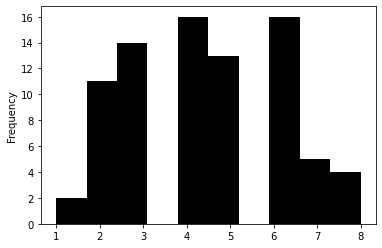

In [54]:
pd.Series(old_queen.cardinalities).plot.hist(color='k');

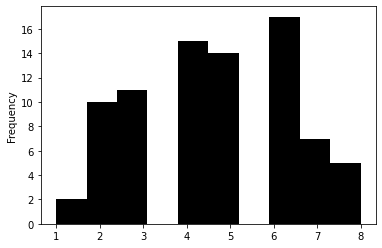

In [55]:
pd.Series(new_queen.cardinalities).plot.hist(color='k');

<AxesSubplot:ylabel='Frequency'>

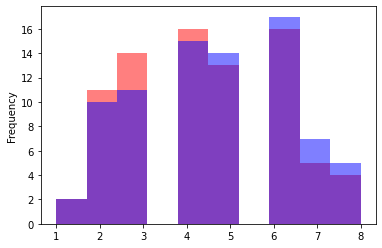

In [56]:
pd.Series(old_queen.cardinalities).plot.hist(color='r', alpha=0.5)
pd.Series(new_queen.cardinalities).plot.hist(color='b', alpha=.5)  

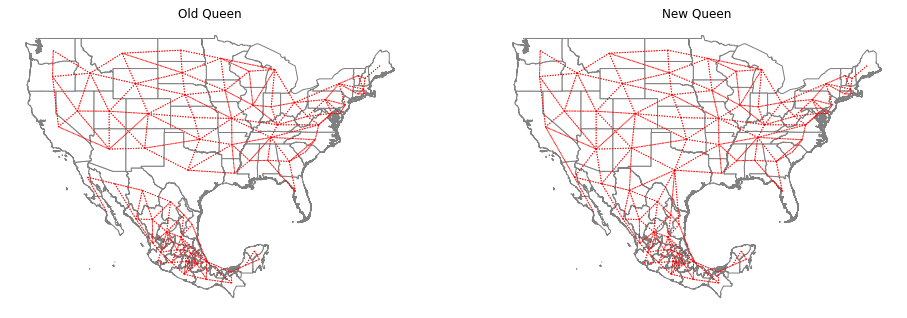

In [57]:
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
old.plot(edgecolor='grey', facecolor='w', ax=ax[0])
old_queen.plot(old, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Old Queen')

ax[0].axis('off')
new.plot(edgecolor='grey', facecolor='w', ax=ax[1])
new_queen.plot(new, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('New Queen')

# remove the axis
ax[1].set_axis_off()

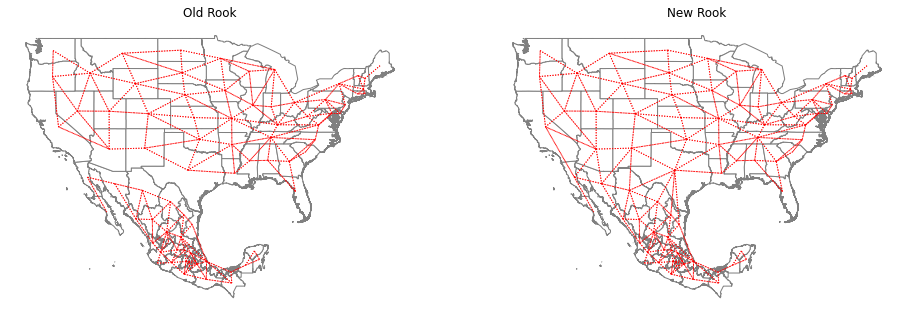

In [58]:
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
old.plot(edgecolor='grey', facecolor='w', ax=ax[0])
old_rook.plot(old, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Old Rook')

ax[0].axis('off')
new.plot(edgecolor='grey', facecolor='w', ax=ax[1])
new_rook.plot(new, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('New Rook')

# remove the axis
ax[1].set_axis_off()